ANALISIS DE VALORES DE CASAS DE ACUERDO A SUS CARACTERISTICAS, APLICACION DE MODELO DE MACHINE LEARNING PARA RESOLVERLO

1.EDA, posterior analisis exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que puedan afectar la calidad del modelo, si los hay.

Cargamos todas las bibliotecas que tendremos que utilizar, en caso de faltar, se sumaran mas adelante.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# MODELOS
from sklearn.model_selection import KFold
import sklearn.linear_model as lm
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

# METRICAS DE REGRESION
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Revisamos documentación

In [ ]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house[house.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [ ]:
house.drop_duplicates(inplace=True)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house.isna()
house.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


OK, no tenemos NaN, ni duplicados, los datos estan limpios para poder comenzar a modificarlos

In [ ]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#Borraremos datos atipicos primero

# Definir las columnas numéricas
numerical_cols = house.select_dtypes(include=['int64', 'float64']).columns

# Inicializar un DataFrame limpio (sin valores atípicos)
df_limpio = house.copy()

# Aplicar el filtro de valores atípicos a cada columna numérica
for col in numerical_cols:
    # Calcular Q1, Q3 e IQR
    Q1 = df_limpio[col].quantile(0.25)
    Q3 = df_limpio[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites superior e inferior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los datos dentro de los límites
    df_limpio = df_limpio[(df_limpio[col] >= limite_inferior) & (df_limpio[col] <= limite_superior)]

# Mostrar el DataFrame después de eliminar los valores atípicos
print(f"Filas originales: {len(house)}")
print(f"Filas después de eliminar atípicos: {len(df_limpio)}")
print(df_limpio.head())

Filas originales: 21613
Filas después de eliminar atípicos: 13868
           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   
6  1321400060  20140627T000000  257500         3       2.25         1715   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
6      6819     2.0           0     0  ...      7        1715              0 

In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13868 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13868 non-null  int64  
 1   date           13868 non-null  object 
 2   price          13868 non-null  int64  
 3   bedrooms       13868 non-null  int64  
 4   bathrooms      13868 non-null  float64
 5   sqft_living    13868 non-null  int64  
 6   sqft_lot       13868 non-null  int64  
 7   floors         13868 non-null  float64
 8   waterfront     13868 non-null  int64  
 9   view           13868 non-null  int64  
 10  condition      13868 non-null  int64  
 11  grade          13868 non-null  int64  
 12  sqft_above     13868 non-null  int64  
 13  sqft_basement  13868 non-null  int64  
 14  yr_built       13868 non-null  int64  
 15  yr_renovated   13868 non-null  int64  
 16  zipcode        13868 non-null  int64  
 17  lat            13868 non-null  float64
 18  long       

Ya, una vez hecha la limpieza y sabiendo que estan todas las columnas en formatos de numeros, y balanceados, podremos seguir en el siguiente paso

2. Realizar un análisis descriptivo de las variables para entender la distribución de los
datos y detectar posibles relaciones entre las características y los precios. En esto
debes incluir un análisis de correlaciones entre las variables principalmente con el
precio de las casas

Creo es que es importante mencionar de que trata cada columna del df, seran explicadas a continuacion:

*   **id**: numero identificador
*   **date**: fecha
*   **price**: precio (en dolares)
*   **bedrooms**: dormitorios en la construccion
*   **bathrooms**: baños en la construccion
*   **sqft_living**: dimension en metros cuadrados de la sala de estar
*   **sqft_lot**: dimension en metros cuadrados del terreno
*   **Floors**: Nº de pisos
*   **waterfront**: si tiene vista al mar, rio
*   **view**: si tiene vista a area verde
*   **condition**: condiciones de la construccion
*   **grade**: evaluacion de la construccion
*   **sqft_above**: tamaño del area por encima del nivel del suelo
*   **sqft_basement**: tamaño del sotano
*   **yr_built**: cuando fue construido
*   **yr_renovated**: cuando fue renovado
*   **zipcode**: numero zip (direccion)
*   **lat**: latidud
*   **long**: longitud
*   **sqft_living15**: dimension del living en medida de bloques
*   **sqft_lot15**: dimension de la construccion total en medida de bloques

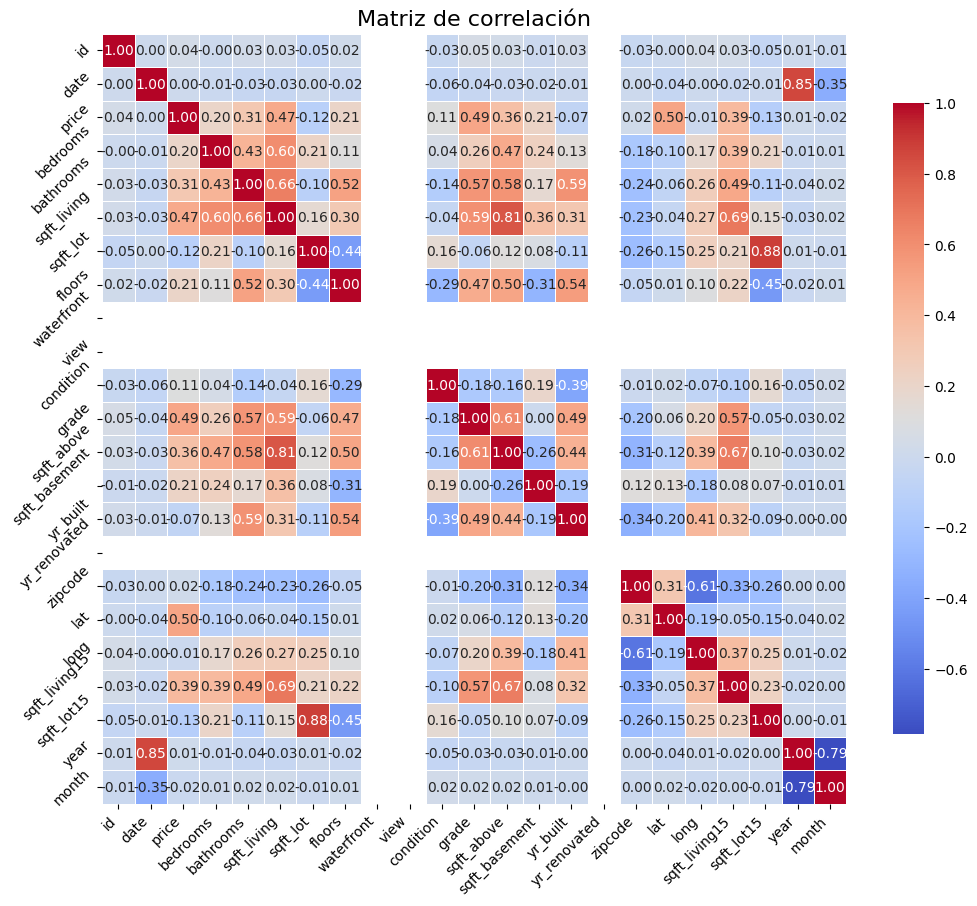

In [ ]:
# la columna date esta en object, necesitamos cambiarla a numerico
df_limpio['date'] = pd.to_datetime(df_limpio['date'])
# Convert the 'date' column to datetime objects

# Calcular la matriz de correlación
corr_matrix = df_limpio.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el heatmap usando seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .82})

# Títulos y etiquetas
plt.title("Matriz de correlación", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

Notamos que existe una correlacion con 4 variables, vale decir, utilizando la variable de precio ( que es la solicitada en el ejercicio), hay 5 valores por sobre 0.30, por ende, ellos tienen correlacion positiva, estas son: sqft_living, grade, lat, sqft_living15, sqft_above y bathrooms.

In [ ]:
df_limpio.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6


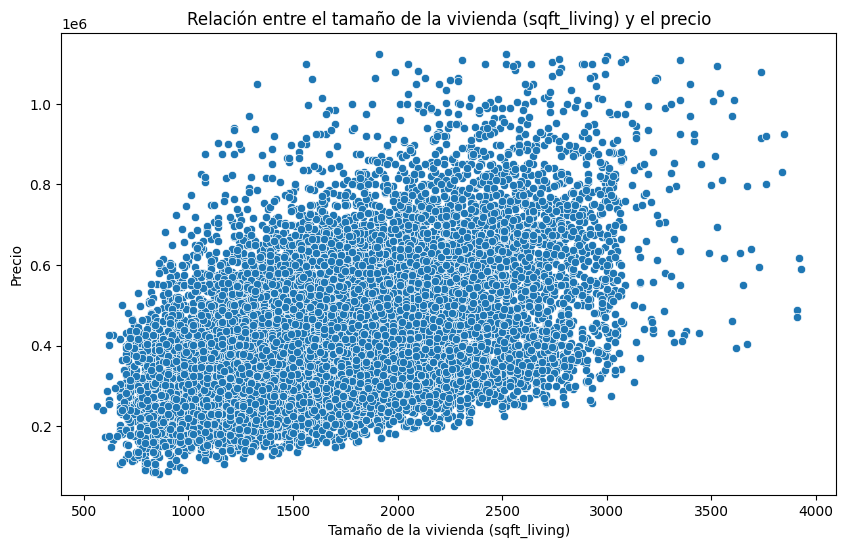

In [ ]:
# Gráfico de dispersión para `sqft_living` vs. `price`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df_limpio)
plt.title('Relación entre el tamaño de la vivienda (sqft_living) y el precio')
plt.xlabel('Tamaño de la vivienda (sqft_living)')
plt.ylabel('Precio')
plt.show()

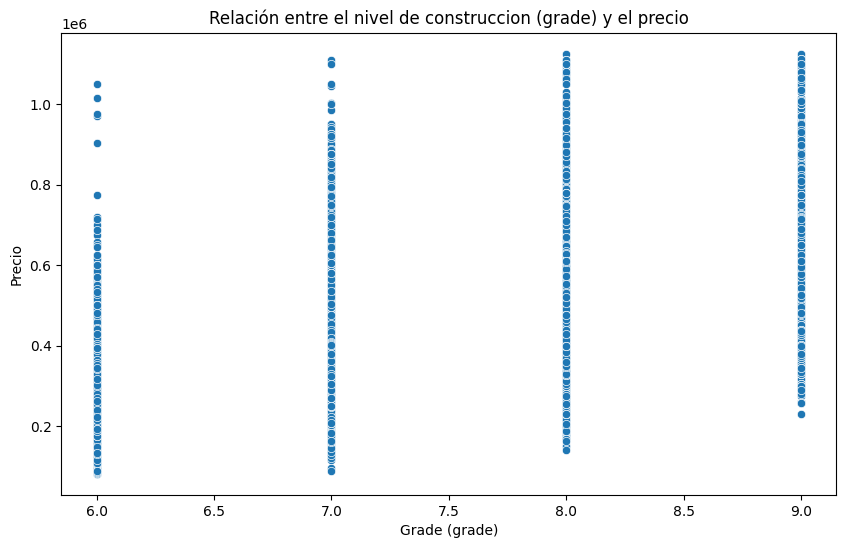

In [ ]:
# Gráfico de dispersión para `grade` vs. `price`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='price', data=df_limpio)
plt.title('Relación entre el nivel de construccion (grade) y el precio')
plt.xlabel('Grade (grade)')
plt.ylabel('Precio')
plt.show()

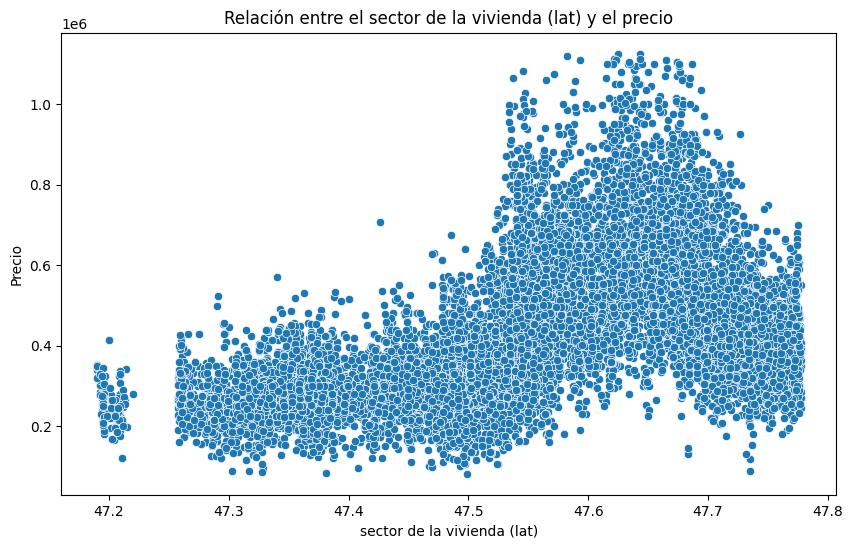

In [ ]:
# Gráfico de dispersión para `lat` vs. `price`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='price', data=df_limpio)
plt.title('Relación entre el sector de la vivienda (lat) y el precio')
plt.xlabel('sector de la vivienda (lat)')
plt.ylabel('Precio')
plt.show()

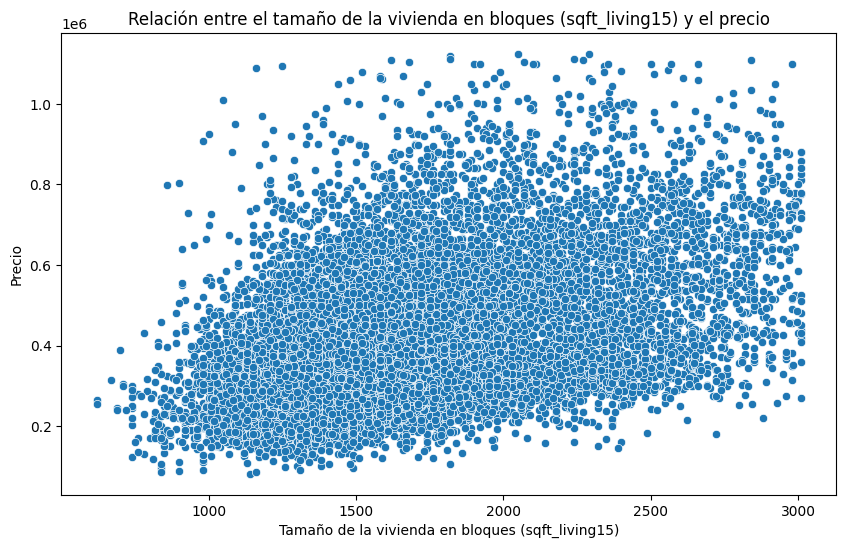

In [ ]:
# Gráfico de dispersión para `sqft_living15` vs. `price`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living15', y='price', data=df_limpio)
plt.title('Relación entre el tamaño de la vivienda en bloques (sqft_living15) y el precio')
plt.xlabel('Tamaño de la vivienda en bloques (sqft_living15)')
plt.ylabel('Precio')
plt.show()

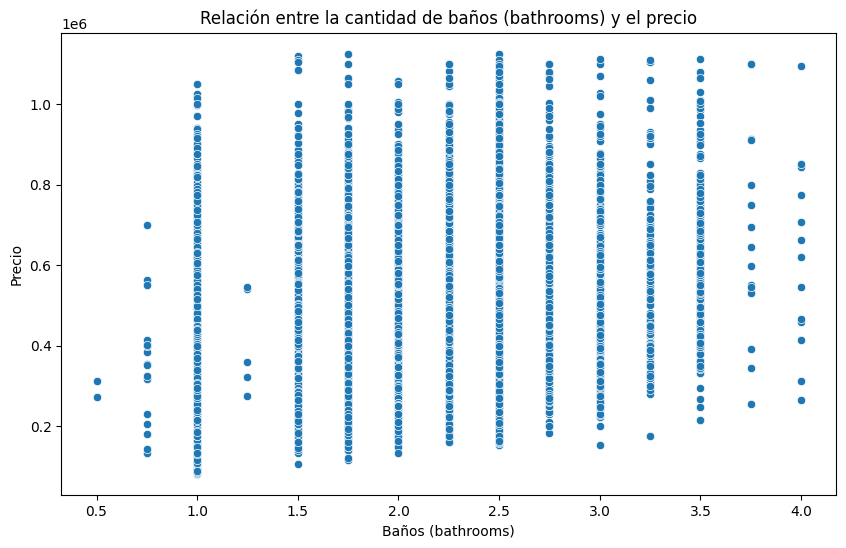

In [ ]:
# Gráfico de dispersión para `bathrooms` vs. `price`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=df_limpio)
plt.title('Relación entre la cantidad de baños (bathrooms) y el precio')
plt.xlabel('Baños (bathrooms)')
plt.ylabel('Precio')
plt.show()

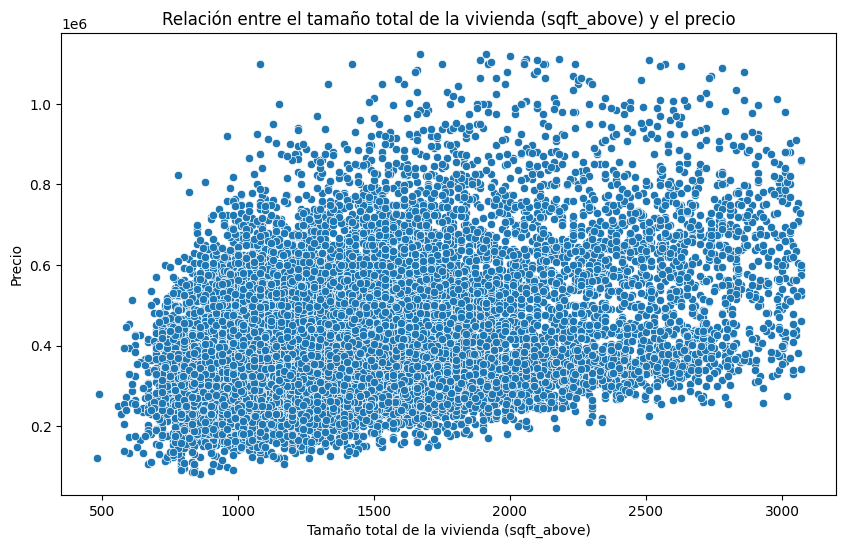

In [ ]:
# Gráfico de dispersión para `sqft_above` vs. `price`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_above', y='price', data=df_limpio)
plt.title('Relación entre el tamaño total de la vivienda (sqft_above) y el precio')
plt.xlabel('Tamaño total de la vivienda (sqft_above)')
plt.ylabel('Precio')
plt.show()

Conclusiones hasta aca, las variables graficasdas tienen correlaciones positivas, y existe una distribucion bastante pareja. Sin embargo, tenemos una columna que se repite en informacion, dejaremos solo la relevante, que para nosotros seria 'sqft_living', la otra 'sqft_living15' Por lo tanto, la dejaremos afuera ya que es repeticion de informacion, pero solo con otro tipo de medida.

3. Aplicar técnicas de transformación de datos, como normalización o estandarización,
para asegurar que las variables estén en una escala comparable. Luego de ello,
divide el conjunto de datos en conjuntos de entrenamiento y prueba de manera
aleatoria o estratificada.

In [ ]:
# Seleccionamos las columnas deseadas para hacer el Machine Learning
columns_to_keep = ['price', 'sqft_living', 'grade', 'lat', 'sqft_above']

# Creamos un nuevo DataFrame con solo esas columnas
df_ml = df_limpio[columns_to_keep]

# Verificamos el nuevo DataFrame
print(df_ml.head())

    price  sqft_living  grade      lat  sqft_above
0  221900         1180      7  47.5112        1180
2  180000          770      6  47.7379         770
3  604000         1960      7  47.5208        1050
4  510000         1680      8  47.6168        1680
6  257500         1715      7  47.3097        1715


Afortunadamente, los datos que estan aqui, son todos numericos y no tienen una diferencia importante tener que modificar, como numeros decimales en 0 y otra dificultad numerica.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas a normalizar
columns_to_normalize = ['sqft_living', 'grade', 'lat', 'sqft_above']

# Inicializamos el scaler
scaler = MinMaxScaler()

# Aplicamos la normalización
df_ml[columns_to_normalize] = scaler.fit_transform(df_ml[columns_to_normalize])

# Mostrar los primeros datos del DataFrame normalizado
print(df_ml.head())


    price  sqft_living     grade       lat  sqft_above
0  221900     0.183976  0.333333  0.547016    0.270270
2  180000     0.062315  0.000000  0.932494    0.111969
3  604000     0.415430  0.333333  0.563340    0.220077
4  510000     0.332344  0.666667  0.726577    0.463320
6  257500     0.342730  0.333333  0.204387    0.476834


El proceso de normalizacion, nos regula los datos de las columnas a un rango numerico estable, mayoritariamente entre 0 y 1, con la finalidad de que todos esten balanceados a la hora de hacer un analisis.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas a estandarizar
columns_to_standardize = ['sqft_living', 'grade', 'lat', 'sqft_above']

# Inicializamos el scaler
scaler = StandardScaler()

# Aplicamos la estandarización
df_ml[columns_to_standardize] = scaler.fit_transform(df_ml[columns_to_standardize])

# Mostrar los primeros datos del DataFrame estandarizado
print(df_ml.head())


    price  sqft_living     grade       lat  sqft_above
0  221900    -1.023048 -0.424697 -0.335742   -0.643416
2  180000    -1.765120 -1.711220  1.247471   -1.410616
3  604000     0.388699 -0.424697 -0.268698   -0.886675
4  510000    -0.118082  0.861825  0.401740    0.292195
6  257500    -0.054734 -0.424697 -1.742965    0.357688


La Standarizacion es otro tipo de regularizacion, que considera un espectro de valores entre el 1 y el -1 pasando por el 0, este pido de regularizacion es importante al igual que sea complementada con la normalizacion, ¿porqué razón? ya que vamos a pasar los datos por distintos tipos de modelos, estos trabajan con distintas lecturas, entonces un DF ya depurado y balanceado tiene mayor facilidad para hacer un analisis comparativo.

In [ ]:
#Separacion de los datos

X = df_ml[['sqft_living', 'grade', 'lat', 'sqft_above']]  # Variables independientes
y = df_ml['price']  # Variable dependiente (el precio)

In [ ]:
# División aleatoria en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Conjunto de entrenamiento X: {X_train.shape}")
print(f"Conjunto de prueba X: {X_test.shape}")
print(f"Conjunto de entrenamiento y: {y_train.shape}")
print(f"Conjunto de prueba y: {y_test.shape}")

Conjunto de entrenamiento X: (11094, 4)
Conjunto de prueba X: (2774, 4)
Conjunto de entrenamiento y: (11094,)
Conjunto de prueba y: (2774,)


In [ ]:
# Definir un rango de valores para los hiperparámetros
alpha_values = np.logspace(-6, 6, 13)

Con esto estan listos nuestros datos para comenzar a entrenarlos, cosa que se hará en la siguiente parte:

4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso o
Elastic Net y ajuste los hiper parámetros mostrando como se mueve los
hiperparametros y el ajuste. Además, debes construir modelos de árboles de
regresión para capturar relaciones no lineales y complejas entre las variables
predictoras y el precio de las casas.

In [ ]:
# Ajustar el modelo Ridge
ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])
ridge.fit(X_train, y_train)  # Entrenamiento

# Realizar predicciones en el conjunto de prueba
y_pred_ridge = ridge.predict(X_test)

# Calcular MSE en el conjunto de prueba
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'MSE en test para Ridge: {mse_ridge}')


MSE en test para Ridge: 13473111721.496344


Mejor valor de alpha para Ridge: {'alpha': 1e-06}
Mejor score de Ridge: -14067328393.29633


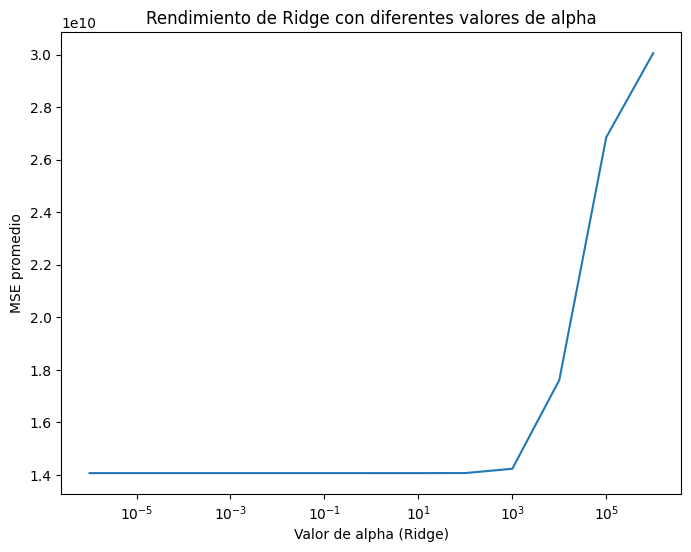

MSE en test para Ridge: 13473111721.496344


In [ ]:
from sklearn.model_selection import GridSearchCV

# Modelo Ridge con GridSearchCV
ridge = Ridge()
param_grid_ridge = {'alpha': alpha_values}

ridge_grid = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Mejor parámetro de Ridge
print(f"Mejor valor de alpha para Ridge: {ridge_grid.best_params_}")
print(f"Mejor score de Ridge: {ridge_grid.best_score_}")

# Visualización del rendimiento para diferentes valores de alpha
plt.figure(figsize=(8, 6))
plt.semilogx(ridge_grid.cv_results_['param_alpha'], -ridge_grid.cv_results_['mean_test_score'])
plt.xlabel('Valor de alpha (Ridge)')
plt.ylabel('MSE promedio')
plt.title('Rendimiento de Ridge con diferentes valores de alpha')
plt.show()

# Evaluar el rendimiento final en el conjunto de prueba
y_pred_ridge = ridge_grid.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'MSE en test para Ridge: {mse_ridge}')


In [ ]:
# Ajustar el modelo Lasso
lasso = Lasso(alpha=lasso_grid.best_params_['alpha'])
lasso.fit(X_train, y_train)  # Entrenamiento

# Realizar predicciones en el conjunto de prueba
y_pred_lasso = lasso.predict(X_test)

# Calcular MSE en el conjunto de prueba
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'MSE en test para Lasso: {mse_lasso}')


MSE en test para Lasso: 13473111721.46252


Mejor valor de alpha para Lasso: {'alpha': 1e-06}
Mejor score de Lasso: -14067328393.29668


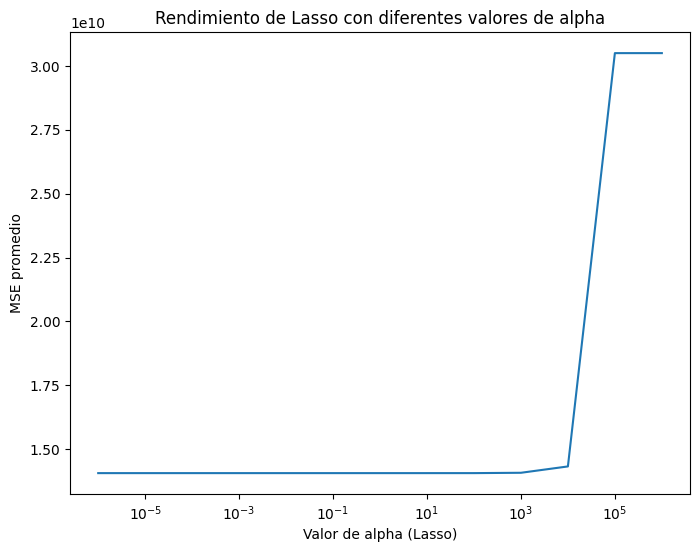

MSE en test para Lasso: 13473111721.46252


In [ ]:
# Modelo Lasso con GridSearchCV
lasso = Lasso()
param_grid_lasso = {'alpha': alpha_values}

lasso_grid = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Mejor parámetro de Lasso
print(f"Mejor valor de alpha para Lasso: {lasso_grid.best_params_}")
print(f"Mejor score de Lasso: {lasso_grid.best_score_}")

# Visualización del rendimiento para diferentes valores de alpha
plt.figure(figsize=(8, 6))
plt.semilogx(lasso_grid.cv_results_['param_alpha'], -lasso_grid.cv_results_['mean_test_score'])
plt.xlabel('Valor de alpha (Lasso)')
plt.ylabel('MSE promedio')
plt.title('Rendimiento de Lasso con diferentes valores de alpha')
plt.show()

# Evaluar el rendimiento final en el conjunto de prueba
y_pred_lasso = lasso_grid.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'MSE en test para Lasso: {mse_lasso}')


In [ ]:
# Ajustar el modelo ElasticNet
elasticnet = ElasticNet(alpha=elasticnet_grid.best_params_['alpha'],
                       l1_ratio=elasticnet_grid.best_params_['l1_ratio'])
elasticnet.fit(X_train, y_train)  # Entrenamiento

# Realizar predicciones en el conjunto de prueba
y_pred_en = elasticnet.predict(X_test)

# Calcular MSE en el conjunto de prueba
mse_en = mean_squared_error(y_test, y_pred_en)
print(f'MSE en test para ElasticNet: {mse_en}')

MSE en test para ElasticNet: 13473111721.46252


Mejor valor de alpha para ElasticNet: {'alpha': 1e-06, 'l1_ratio': 1.0}
Mejor score de ElasticNet: -14067328393.29668


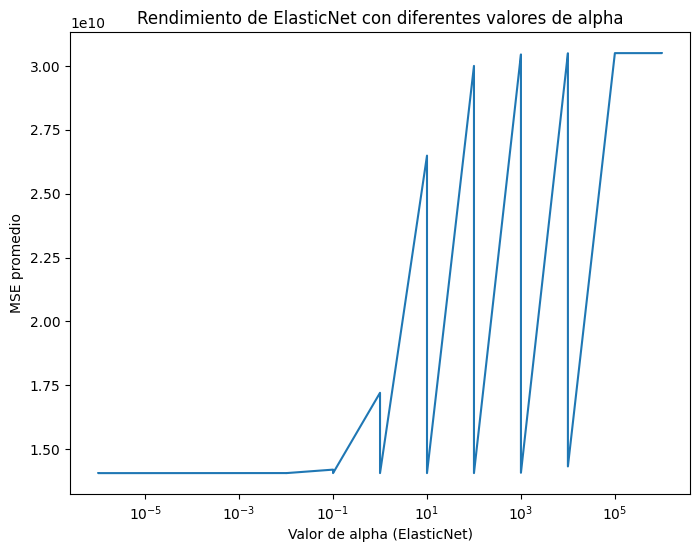

MSE en test para ElasticNet: 13473111721.46252


In [ ]:
# Modelo ElasticNet con GridSearchCV
elasticnet = ElasticNet()
param_grid_elasticnet = {'alpha': alpha_values, 'l1_ratio': np.linspace(0, 1, 10)}

elasticnet_grid = GridSearchCV(elasticnet, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train, y_train)

# Mejor parámetro de ElasticNet
print(f"Mejor valor de alpha para ElasticNet: {elasticnet_grid.best_params_}")
print(f"Mejor score de ElasticNet: {elasticnet_grid.best_score_}")

# Visualización del rendimiento para diferentes valores de alpha
plt.figure(figsize=(8, 6))
plt.semilogx(elasticnet_grid.cv_results_['param_alpha'], -elasticnet_grid.cv_results_['mean_test_score'])
plt.xlabel('Valor de alpha (ElasticNet)')
plt.ylabel('MSE promedio')
plt.title('Rendimiento de ElasticNet con diferentes valores de alpha')
plt.show()

# Evaluar el rendimiento final en el conjunto de prueba
y_pred_en = elasticnet_grid.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)
print(f'MSE en test para ElasticNet: {mse_en}')


In [ ]:
# Crear el modelo de árbol de regresión
tree = DecisionTreeRegressor(random_state=42)

# Definir la grilla de parámetros
param_grid_tree = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
tree_grid = GridSearchCV(tree, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, y_train)  # Entrenar el modelo

# Ahora que el modelo ha sido ajustado, puedes acceder a los mejores parámetros
print(f"Mejores parámetros para el árbol: {tree_grid.best_params_}")
print(f"Mejor score para el árbol: {tree_grid.best_score_}")

# Ajustar el modelo de árbol con los mejores parámetros encontrados
best_tree = DecisionTreeRegressor(max_depth=tree_grid.best_params_['max_depth'],
                                  min_samples_split=tree_grid.best_params_['min_samples_split'],
                                  min_samples_leaf=tree_grid.best_params_['min_samples_leaf'])
best_tree.fit(X_train, y_train)  # Entrenamiento final con los mejores parámetros

# Realizar predicciones en el conjunto de prueba
y_pred_tree = best_tree.predict(X_test)

# Calcular MSE en el conjunto de prueba
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'MSE en test para Árbol de Regresión: {mse_tree}')



Mejores parámetros para el árbol: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor score para el árbol: -8289621663.510048
MSE en test para Árbol de Regresión: 7753588945.105291


5. Utilizar métricas de evaluación de regresión, como el Error Cuadrático Medio (MSE),
el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R2), para medir el
rendimiento del modelo y concluir sobre ellos.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Para el modelo de Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Para el modelo de Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Para el modelo ElasticNet
mse_en = mean_squared_error(y_test, y_pred_en)
mae_en = mean_absolute_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)

# Para el modelo de Árbol de Regresión
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


In [ ]:
# Imprimir resultados para Ridge
print("Ridge Regression:")
print(f"MSE: {mse_ridge}")
print(f"MAE: {mae_ridge}")
print(f"R²: {r2_ridge}")

# Imprimir resultados para Lasso
print("\nLasso Regression:")
print(f"MSE: {mse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R²: {r2_lasso}")

# Imprimir resultados para ElasticNet
print("\nElasticNet Regression:")
print(f"MSE: {mse_en}")
print(f"MAE: {mae_en}")
print(f"R²: {r2_en}")

# Imprimir resultados para Árbol de Regresión
print("\nDecision Tree Regression:")
print(f"MSE: {mse_tree}")
print(f"MAE: {mae_tree}")
print(f"R²: {r2_tree}")


Ridge Regression:
MSE: 13473111721.496344
MAE: 86647.73961536157
R²: 0.5588705810599384

Lasso Regression:
MSE: 13473111721.46252
MAE: 86647.73961556079
R²: 0.5588705810610459

ElasticNet Regression:
MSE: 13473111721.46252
MAE: 86647.73961556079
R²: 0.5588705810610459

Decision Tree Regression:
MSE: 7750643657.856508
MAE: 63247.227967365274
R²: 0.7462325701829784


**CONCLUSION**
**Modelo de mejor rendimiento:**

El Decision Tree Regression tiene el mejor rendimiento general, con el MSE más bajo, el MAE más bajo y el R² más alto. Este modelo captura mejor las relaciones no lineales y tiene una mayor capacidad de explicación sobre los datos en comparación con los modelos lineales.
Modelos lineales (Ridge, Lasso, ElasticNet):

Los modelos de Ridge, Lasso y ElasticNet presentan un rendimiento muy similar entre sí, con el MSE y MAE más altos, y un R² significativamente más bajo que el del Decision Tree. En un principio es alarmante que tengan los mismo valores pero esto sugiere que las relaciones en los datos no son completamente lineales y los modelos de regresión lineales no son tan efectivos en este caso.

Elección del modelo:

El Decision Tree Regression parece ser la mejor opción.
Si prefieres usar un modelo de regresión lineal y te preocupa la regularización (por ejemplo, evitar el sobreajuste), podrías considerar Ridge, Lasso o ElasticNet, aunque los resultados sugieren que no se ajustan tan bien a este conjunto de datos en particular.

**POSTERIORES EJERCICIOS**

Una vez entrenado el modelo de Decision Tree Regression, podemos usarlo para:

Predecir precios de casas en base a nuevas entradas de datos.

Analizar la importancia de las características para comprender qué factores influyen más en los precios.

Visualizar cómo el modelo toma decisiones y explorar segmentos del mercado.

Detectar posibles valores atípicos o errores en los precios de las casas.

Optimizar precios y hacer recomendaciones basadas en las características de las casas.

# ***Esto quedaria pendiente para otro tipo de analisis***